# Iris Dataset - Deep Learning Model

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
# Load data and review content
iris_data = pd.read_csv("D:\MTech\Machine Learning for AEVs\Practice\iris.csv")
print("\nLoaded Data :\n=====================================================================")
print(iris_data.head())


Loaded Data :
   Sepal length  Sepal width  Petal length  Petal width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Input preprocessing

In [3]:
# Using a label encoder to convert string to numeric values
# For the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [4]:
# Convert input to numpy array
np_iris = iris_data.to_numpy()

In [5]:
# Seperate feature and target variables
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]

print("\nFeatures before scaling: \n================================================================")
print(X_data[:5, :])
print("\nTarget before scaling: \n==================================================================")
print(Y_data[:5])


Features before scaling: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling: 
[0. 0. 0. 0. 0.]


In [6]:
# Create a scalar model that is fit on the input data
scaler = StandardScaler().fit(X_data)

# Scale the numeric features variables
X_data = scaler.transform(X_data)

# Convert the target variable as a one-hot encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling: \n================================================================")
print(X_data[:5, :])
print("\nTarget after scaling: \n==================================================================")
print(Y_data[:5, :])


Features after scaling: 
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]

Target after scaling: 
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [7]:
# Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10)
print("\nTrain Test Dimensions:\n======================================================================")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
(135, 4) (135, 3) (15, 4) (15, 3)


# Creating a deep learning model

In [8]:
from tensorflow import keras

# Number of classes in the target variables
NB_CLASSES = 3

# Create a sequential model in keras
model = tf.keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(
    128,                                                   # Number of nodes = 128 * 5 = 640, 5th is bias
    input_shape=(4,),                                      # Number of input variables
    name='hidden_layer_1',                                 # Logical name
    activation='relu'                                      # Activation function
))                           

# Add a second hidden layer
model.add(keras.layers.Dense(
    128,
    name='hidden_layer_2',
    activation='relu'
))

# Add an output layer with softmax activation function
model.add(keras.layers.Dense(
    NB_CLASSES,
    name='output_layer',
    activation='softmax'
))

# Compile the model with loss and metrics
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               640       
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Training and evaluation


Training Progress:
Epoch 1/10
7/7 [==============================] - 1s 53ms/step - loss: 0.8447 - accuracy: 0.6852 - val_loss: 0.6564 - val_accuracy: 0.7407
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5143 - accuracy: 0.8796 - val_loss: 0.5364 - val_accuracy: 0.7407
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3945 - accuracy: 0.8796 - val_loss: 0.4891 - val_accuracy: 0.7407
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3279 - accuracy: 0.8704 - val_loss: 0.4783 - val_accuracy: 0.7407
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2908 - accuracy: 0.8889 - val_loss: 0.4605 - val_accuracy: 0.7407
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2605 - accuracy: 0.8796 - val_loss: 0.4687 - val_accuracy: 0.8148
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2384 - accuracy: 0.9074 - val_loss: 0.4365 - val_accuracy: 0.7407
Epoch 8/10


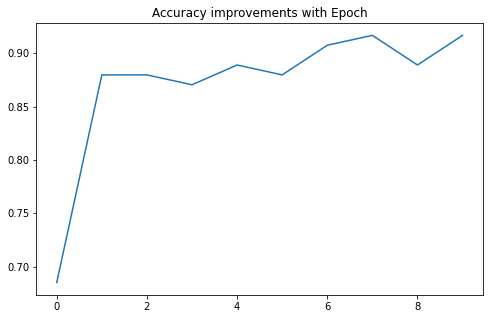


Evaluation against Test Dataset: 
1/1 [==============================] - 0s 33ms/step - loss: 0.2272 - accuracy: 0.9333


[0.22715610265731812, 0.9333333373069763]

In [9]:
# Make it progress so we can see the progress
VERBOSE=1

# Setup Hyper Parameters for training

# Set Batch size = 2 power n range
BATCH_SIZE=16                                 
# Set number of epochs
EPOCHS=10
# Set validation split, 20% of training data will be used for validation
# after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n=====================================================================================================================================")

# Fit the model, this will perform the entire training cycle, including
# Forward propagation, loss computation, backward propagation and gradient descent
# Execute for the specified batch sizes and epoch
# Perform validation after each epoch
history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    validation_split= VALIDATION_SPLIT
)

print("\nAccuracy during Training: \n=====================================================================================================================================")
import matplotlib.pyplot as plt

# Plot the accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# Evaluate the model against test dataset and print results
print("\nEvaluation against Test Dataset: \n===================================================================================================================")
model.evaluate(X_test, Y_test)

# Saving and loading model

In [10]:
# Saving a model
model.save("iris_save")

# Loading a model
loaded_model = keras.models.load_model("iris_save")

# Print model summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               640       
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [12]:
# Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

# Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

# Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities):", raw_prediction)

# Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 5s 5s/step
Raw Prediction Output (Probabilities): [[0.03536505 0.63477474 0.32986018]]
Prediction is  ['Iris-versicolor']
